In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in our datasets
stops_1 = pd.read_csv('./StopData1.csv')
stops_2 = pd.read_csv('./StopData2.csv')

In [3]:
stops_1.head()

,stop_id,officer_id,driver_id,driver_age,driver_sex,ticket
0,1279,D,1031,43.0,f,False
1,3626,C,43,53.0,m,True
2,4329,C,4527,21.0,m,True
3,3165,A,1408,31.0,f,True
4,4876,B,3090,28.0,m,True


In [4]:
stops_1.shape

(2324, 6)

In [5]:
stops_2.shape

(2324, 2)

In [6]:
# merge the two datasets on the 'stop_id' column 
stops = pd.merge(stops_1, stops_2, how='inner', on = 'stop_id')

In [7]:
# several drivers were stopped more than once
stops['driver_id'].value_counts().head(10)

478     5
3417    4
1205    4
2835    4
2206    4
3786    4
4745    4
2531    3
3451    3
1625    3
Name: driver_id, dtype: int64

In [8]:
stops.shape

(2324, 7)

In [9]:
stops[(stops['driver_age'] == 30) & (stops['driver_sex'] == 'f')]['ticket'].value_counts(normalize=True)

True     0.791667
False    0.208333
Name: ticket, dtype: float64

In [10]:
stops[(stops['driver_age'] == 30) & (stops['driver_sex'] == 'm')]['ticket'].value_counts(normalize=True)

True     0.772727
False    0.227273
Name: ticket, dtype: float64

In [11]:
# this function was taken from stackoverflow.com to deal with an irregular csv
import io

def add_delimiters(fpath, delimiter=','):

    s_data = ''
    max_num_delimiters = 0

    with open(fpath, 'r') as f:
        for line in f:
            s_data += line
            delimiter_count = line.count(delimiter)
            if delimiter_count > max_num_delimiters:
                max_num_delimiters = delimiter_count

    s_delimiters = delimiter * max_num_delimiters + '\n'

    return io.StringIO(s_delimiters + s_data)

courts_data = pd.read_csv(add_delimiters('./CourtsDataV2.csv'))

In [12]:
# created a'cents' column to deal with the 50 cent column 
courts_data['cents'] = courts_data["Unnamed: 2"].map(lambda x: 0 if x != '50' else 50)
courts_data['cents'].head(20)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7     50
8     50
9      0
10     0
11    50
12    50
13     0
14     0
15     0
16     0
17     0
18     0
19     0
Name: cents, dtype: int64

In [13]:
courts_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,cents
0,stop_id,ticket_amount,status,NaN,0
1,3420,55,challenged,NaN,0
2,2865,40,challenged,NaN,0
3,3595,10,challenged,NaN,0
4,2597,60,challenged,NaN,0


In [14]:
# change datatypes from object to str in order in order to concatenate them 
courts_data['cents'] = courts_data['cents'].astype(str, inplace=True)

In [15]:
courts_data['Unnamed: 1'] = courts_data['Unnamed: 1'] + '.' + courts_data['cents']

In [16]:
courts_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,cents
0,stop_id,ticket_amount.0,status,NaN,0
1,3420,55.0,challenged,NaN,0
2,2865,40.0,challenged,NaN,0
3,3595,10.0,challenged,NaN,0
4,2597,60.0,challenged,NaN,0


In [17]:
# renamed our column names
court = courts_data.rename(columns={'Unnamed: 0': 'stop_id', 'Unnamed: 1':'ticket_amount', 'Unnamed: 2':'status'})
court = court.drop(court.index[0])

In [18]:
court.head(10)

,stop_id,ticket_amount,status,Unnamed: 3,cents
1,3420,55.0,challenged,NaN,0
2,2865,40.0,challenged,NaN,0
3,3595,10.0,challenged,NaN,0
4,2597,60.0,challenged,NaN,0
5,409,195.0,overdue,NaN,0
6,3898,20.0,paid,NaN,0
7,3052,70.50,50,pending,50
8,3859,75.50,50,overdue,50
9,3716,105.0,challenged,NaN,0
10,2800,10.0,pending,NaN,0


In [19]:
# drop 'cents' column 
court.drop(columns='cents', inplace=True)

In [20]:
# replaced the '50' in the 'status' column with blank 
court['status'] = court['status'].map(lambda x: '' if x == '50' else x)

In [21]:
# replaced NaN's with blanks
court['Unnamed: 3'] = court['Unnamed: 3'].fillna('')

In [22]:
court.head()

,stop_id,ticket_amount,status,Unnamed: 3
1,3420,55.0,challenged,
2,2865,40.0,challenged,
3,3595,10.0,challenged,
4,2597,60.0,challenged,
5,409,195.0,overdue,


In [23]:
# concatenated 'status' and 'Unnamed: 3' to fill in the 'status' column
court['status'] = court['status'] + court['Unnamed: 3']
court['status'].head()

1    challenged
2    challenged
3    challenged
4    challenged
5       overdue
Name: status, dtype: object

In [24]:
# drop unnecessary 'Unnamed' column 
court.drop(columns='Unnamed: 3',inplace=True)

In [25]:
court.head()

,stop_id,ticket_amount,status
1,3420,55.0,challenged
2,2865,40.0,challenged
3,3595,10.0,challenged
4,2597,60.0,challenged
5,409,195.0,overdue


In [26]:
# weren't left with a lot of data
court.shape

(636, 3)

In [27]:
court.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 1 to 636
Data columns (total 3 columns):
stop_id          636 non-null object
ticket_amount    636 non-null object
status           636 non-null object
dtypes: object(3)
memory usage: 19.9+ KB


In [28]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 7 columns):
stop_id       2324 non-null int64
officer_id    2324 non-null object
driver_id     2324 non-null int64
driver_age    2324 non-null float64
driver_sex    2324 non-null object
ticket        2324 non-null bool
ward          2324 non-null int64
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 129.4+ KB


In [29]:
court['stop_id'] = court['stop_id'].astype(int, inplace=True)

In [30]:
stop_court = pd.merge(stops, court, how='inner', on = 'stop_id')

In [31]:
stop_court.head()

,stop_id,officer_id,driver_id,driver_age,driver_sex,ticket,ward,ticket_amount,status
0,4329,C,4527,21.0,m,True,4,50.0,challenged
1,1299,A,4654,49.0,m,True,7,45.0,overdue
2,456,E,1987,18.0,m,True,5,10.0,challenged
3,287,E,206,43.0,m,True,6,45.0,paid
4,1021,C,4957,24.0,f,True,5,115.50,pending


In [32]:
stop_court.shape

(636, 9)

In [33]:
stop_court['ticket'].value_counts()

True    636
Name: ticket, dtype: int64

In [34]:
stop_court['ticket_amount'] = stop_court['ticket_amount'].astype(float, inplace=True)

In [35]:
stop_court.groupby('driver_sex')['ticket_amount'].mean()

driver_sex
f    78.216263
m    52.984150
Name: ticket_amount, dtype: float64

In [36]:
# calculated percentage difference between ticket $ amounts
(78.216263 - 52.984150) / 52.984150

0.4762200205155693

In [37]:
# ticket $ amounts varies by officer
stop_court.groupby('officer_id')['ticket_amount'].mean().sort_values(ascending=False)

officer_id
C    69.599291
D    66.197581
E    64.448819
B    64.406780
A    57.007937
Name: ticket_amount, dtype: float64

In [38]:
# ticket $ amounts varies by Ward 
stop_court.groupby('ward')['ticket_amount'].mean().sort_values(ascending=False)

ward
1    72.056338
5    69.536765
2    66.280303
8    66.048387
4    62.268750
7    61.795000
6    61.601266
3    58.240506
Name: ticket_amount, dtype: float64

In [39]:
# more tickets were challenged than not 
stop_court['status'].value_counts()

challenged    246
paid          229
overdue       119
pending        42
Name: status, dtype: int64

In [41]:
# modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
# make the 'driver_sex' column numerical
stop_court['driver_sex'] = stop_court['driver_sex'].map(lambda x: 0 if x == 'm' else 1)
stop_court['driver_sex'].head()

0    0
1    0
2    0
3    0
4    1
Name: driver_sex, dtype: int64

In [45]:
X = stop_court[['driver_sex', 'driver_age', 'ticket_amount']]
y = stop_court['status']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [47]:
ss = StandardScaler()
X_tr_sc = ss.fit_transform(X_train)
X_te_sc = ss.transform(X_test)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
lr = LogisticRegression()
lr.fit(X_tr_sc, y_train)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
cross_val_score(lr, X_tr_sc, y_train, cv=5).mean()

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: 

0.4468103081114826

In [50]:
cross_val_score(lr, X_te_sc, y_test, cv=5).mean()

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: 

0.35953079178885633

In [52]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [53]:
rf = RandomForestClassifier()

In [54]:
rf.fit(X_tr_sc, y_train)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
# our predictive models don't score very well
print(cross_val_score(rf, X_tr_sc, y_train, cv=5).mean())
print(cross_val_score(rf, X_te_sc, y_test, cv=5).mean())

0.3336717250392359
0.3321603128054741


In [56]:
# setting up a parameter grid to search over
params = {'max_depth':(None, 1, 3, 5, 7, 9, 11, 13), 'min_samples_split':[2, 3, 4, 5, 7, 9, 10]}

# instantiating a grid search
gs = GridSearchCV(rf, param_grid=params, cv=5)
# fitting the training data to the grid search
gs.fit(X_train, y_train)
# printing the best resulting score
print(gs.best_score_)
# displaying the best resulting parameters
gs.best_params_

0.4444444444444444


/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 1, 'min_samples_split': 10}

In [57]:
rf = RandomForestClassifier(max_depth=1, min_samples_split=10)

In [58]:
rf.fit(X_tr_sc, y_train)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
# not very good scores and also overfit
print(cross_val_score(rf, X_tr_sc, y_train, cv=5).mean())
print(cross_val_score(rf, X_te_sc, y_test, cv=5).mean())

0.43206786504005273
0.35151515151515145


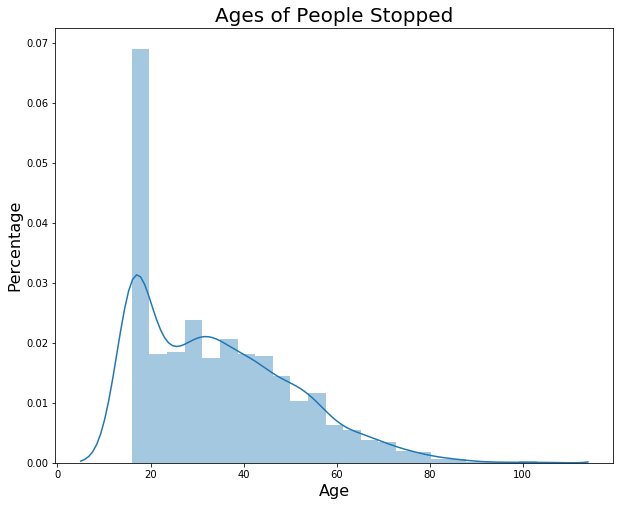

In [60]:
# unsurprisingly most tickets are given to younger drivers
plt.figure(figsize=(10, 8))
sns.distplot(stops['driver_age'])
plt.title('Ages of People Stopped', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Percentage', fontsize=16);

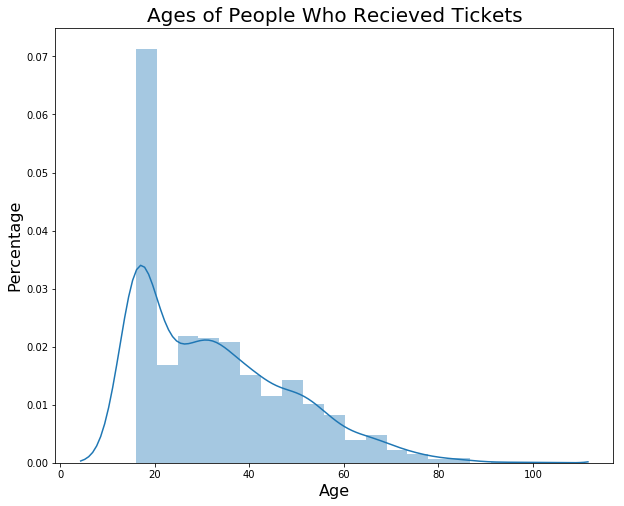

In [61]:
plt.figure(figsize=(10, 8))
sns.distplot(stops[stops['ticket'] == True]['driver_age'])
plt.title('Ages of People Who Recieved Tickets', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Percentage', fontsize=16);

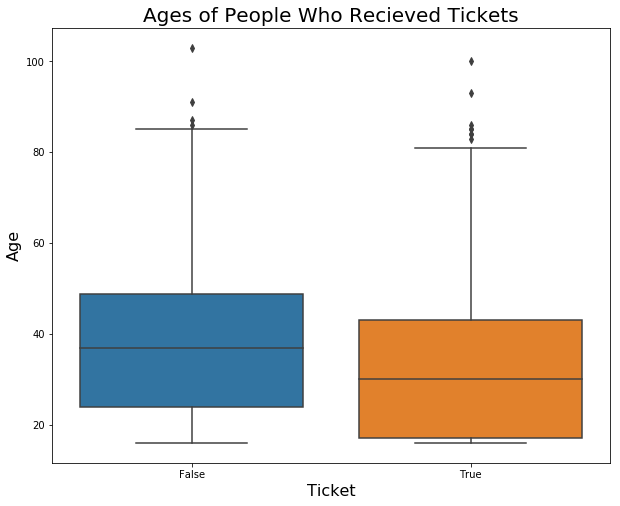

In [62]:
# those outliers are interesting
plt.figure(figsize=(10, 8))
sns.boxplot(x='ticket', y='driver_age', data=stops)
plt.title('Ages of People Who Recieved Tickets', fontsize=20)
plt.xlabel('Ticket', fontsize=16)
plt.ylabel('Age', fontsize=16);

<Figure size 432x288 with 0 Axes>

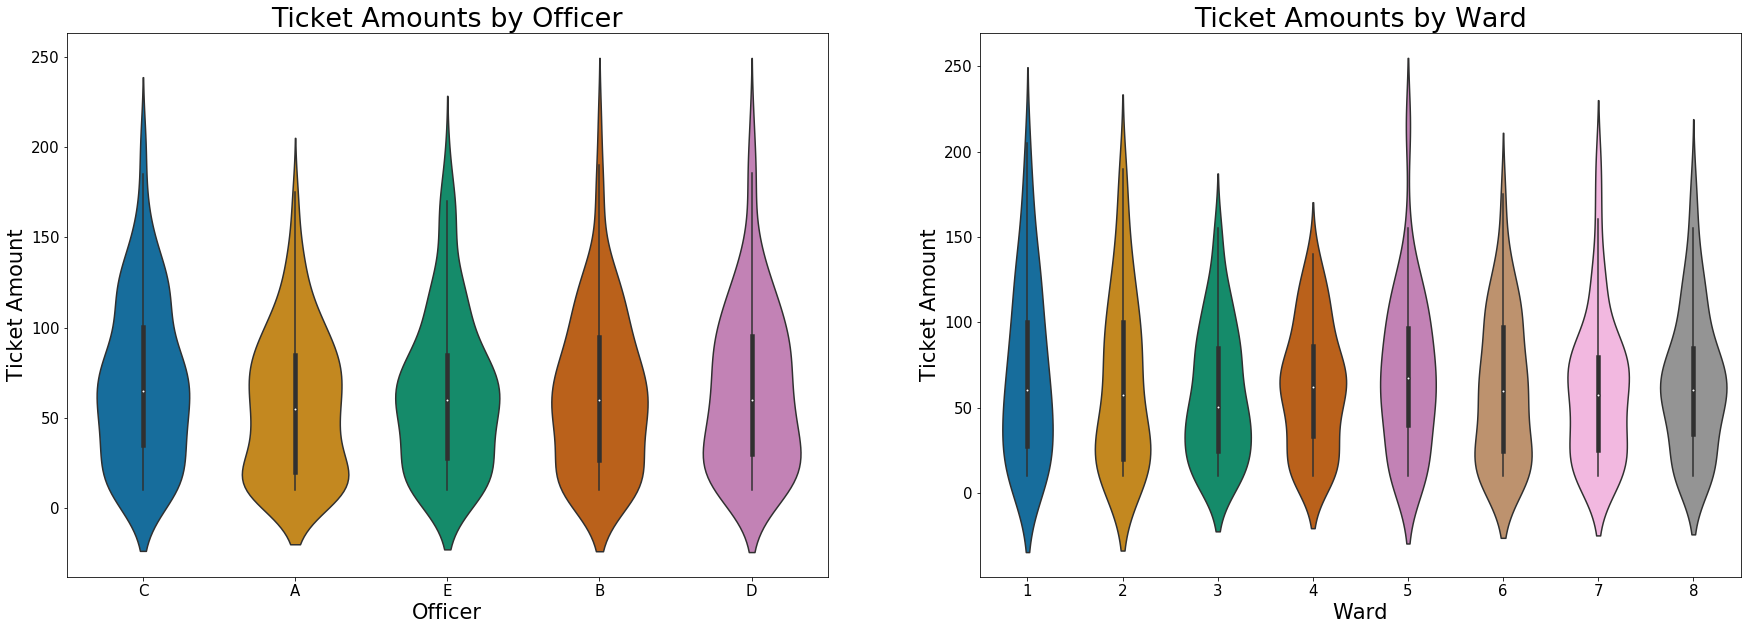

In [66]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(30,10))
sns.violinplot(y='ticket_amount', x='officer_id', data=stop_court, width=0.7, palette='colorblind',ax=ax[0])
ax[0].axes.set_title('Ticket Amounts by Officer', fontsize=27);
ax[0].set_xlabel("Officer", fontsize=21)
ax[0].set_ylabel("Ticket Amount", fontsize=21)
ax[0].tick_params(labelsize=15);
sns.violinplot(y='ticket_amount', x='ward', data=stop_court, width=0.7, palette='colorblind',ax=ax[1])
ax[1].axes.set_title('Ticket Amounts by Ward', fontsize=27);
ax[1].set_xlabel("Ward", fontsize=21)
ax[1].set_ylabel("Ticket Amount", fontsize=21)
ax[1].tick_params(labelsize=15);

In [68]:
sex_avgs = stop_court.groupby('driver_sex')['ticket_amount'].mean()

In [70]:
status_avgs = stop_court.groupby('status')['ticket_amount'].mean()

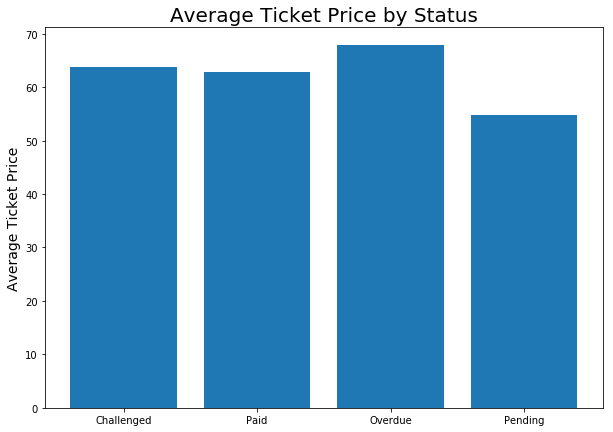

In [71]:
plt.figure(figsize=(10, 7))
plt.bar(x=['Challenged', 'Paid', 'Overdue', 'Pending'], height=status_avgs)
plt.title('Average Ticket Price by Status', fontsize=20)
plt.ylabel('Average Ticket Price', fontsize=14);